In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, Normalizer , MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_excel('Folds5x2_pp.xlsx')

In [3]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [4]:
df.shape

(9568, 5)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,9568.0,19.651231,7.452473,1.81,13.5100,20.345,25.72,37.11
V,9568.0,54.305804,12.707893,25.36,41.7400,52.080,66.54,81.56
AP,9568.0,1013.259078,5.938784,992.89,1009.1000,1012.940,1017.26,1033.30
RH,9568.0,73.308978,14.600269,25.56,63.3275,74.975,84.83,100.16
PE,9568.0,454.365009,17.066995,420.26,439.7500,451.550,468.43,495.76


In [6]:
df[df.isna().any(1)]

,AT,V,AP,RH,PE


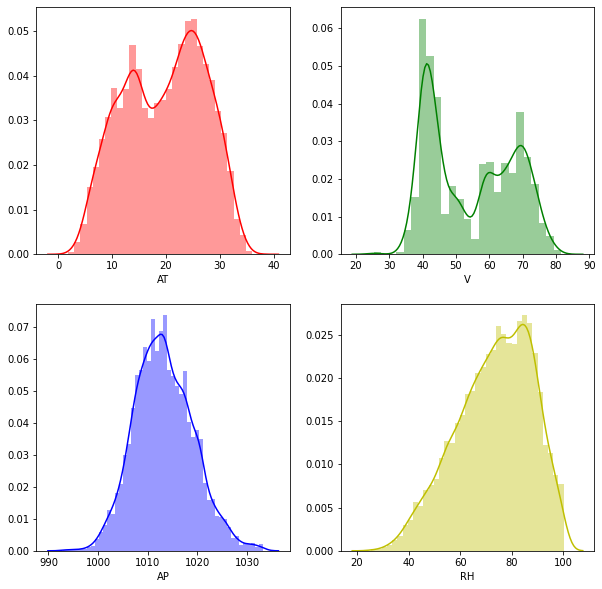

In [7]:
fig, ax = plt.subplots(2,2,figsize = (10,10))
cols = list(df.columns)[:-1]
for i,col in enumerate(cols):
  colors = ['r','g','b','y']
  sns.distplot(df[col],color = colors[i],ax = ax[i//2,i%2])

In [0]:
scAT = StandardScaler()
scV = StandardScaler()
scAP = StandardScaler()
scRH = StandardScaler()
scs = [scAT,scV,scAP,scRH]

In [0]:
for sc,col in zip(scs,df.columns):
    df[col] = sc.fit_transform(df[col].values.reshape(-1,1))

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,9568.0,-1.719813e-16,1.000052,-2.394126,-0.824096,0.093097,0.814372,2.342804
V,9568.0,-2.600229e-16,1.000052,-2.277901,-0.988870,-0.175160,0.962775,2.144779
AP,9568.0,5.504864e-15,1.000052,-3.430019,-0.700362,-0.053731,0.673729,3.374760
RH,9568.0,-3.490855e-16,1.000052,-3.270589,-0.683686,0.114115,0.789138,1.839173
PE,9568.0,4.543650e+02,17.066995,420.260000,439.750000,451.550000,468.430000,495.760000


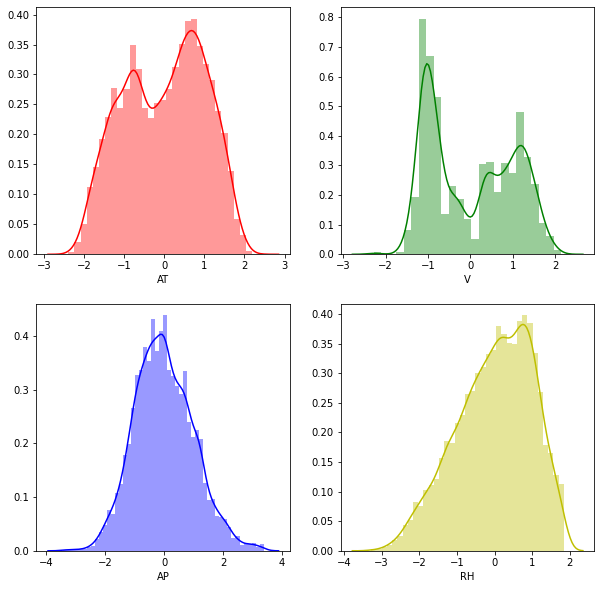

In [11]:
fig, ax = plt.subplots(2,2,figsize = (10,10))
cols = list(df.columns)[:-1]
for i,col in enumerate(cols):
  colors = ['r','g','b','y']
  sns.distplot(df[col],color = colors[i],ax = ax[i//2,i%2])

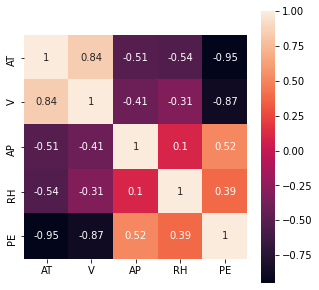

In [12]:
plt.figure(figsize = (5,5))
sns.heatmap(df.corr(),annot = True,square = True)

In [0]:
df2 = pd.read_excel('Folds5x2_pp.xlsx')

In [0]:
norm = Normalizer()
df2 = pd.DataFrame(norm.fit_transform(df2.values),columns = df.columns)

In [15]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,9568.0,0.017686,0.006822,0.001586,0.012038,0.018267,0.023238,0.033822
V,9568.0,0.048803,0.011757,0.022666,0.037215,0.046809,0.060160,0.073974
AP,9568.0,0.909058,0.005095,0.893331,0.905072,0.910031,0.913268,0.921577
RH,9568.0,0.065727,0.012905,0.023129,0.056949,0.067156,0.075805,0.090709
PE,9568.0,0.407528,0.011939,0.380008,0.397384,0.405556,0.417542,0.438793


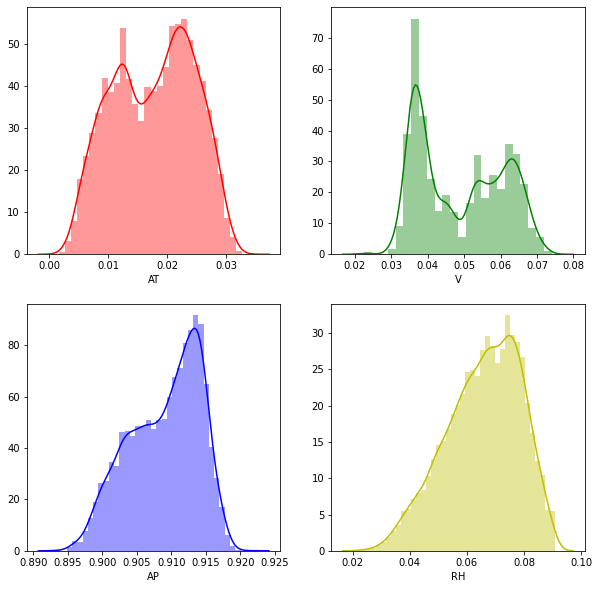

In [16]:
fig, ax = plt.subplots(2,2,figsize = (10,10))
cols = list(df2.columns)[:-1]
for i,col in enumerate(cols):
  colors = ['r','g','b','y']
  sns.distplot(df2[col],color = colors[i],ax = ax[i//2,i%2])

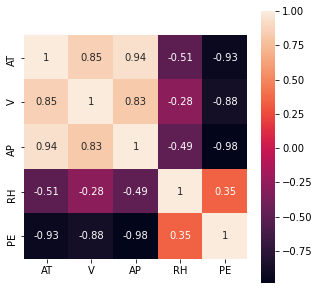

In [17]:
plt.figure(figsize = (5,5))
sns.heatmap(df2.corr(),annot = True,square = True)

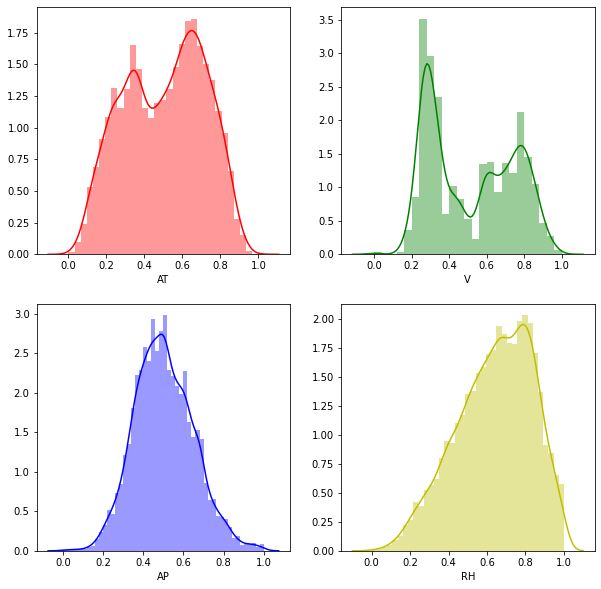

In [18]:
df3 = pd.read_excel('Folds5x2_pp.xlsx')

mmAT = MinMaxScaler()
mmV = MinMaxScaler()
mmAP = MinMaxScaler()
mmRH = MinMaxScaler()
min_maxs = [mmAT,mmV,mmAP,mmRH]

for mm,col in zip(min_maxs,df.columns):
    df3[col] = mm.fit_transform(df3[col].values.reshape(-1,1))

fig, ax = plt.subplots(2,2,figsize = (10,10))
cols = list(df3.columns)[:-1]
for i,col in enumerate(cols):
  colors = ['r','g','b','y']
  sns.distplot(df3[col],color = colors[i],ax = ax[i//2,i%2])

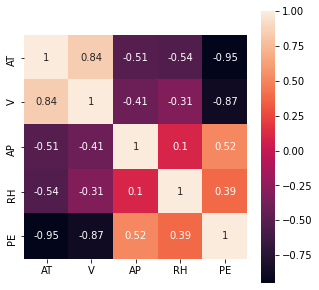

In [19]:
plt.figure(figsize = (5,5))
sns.heatmap(df3.corr(),annot = True,square = True)

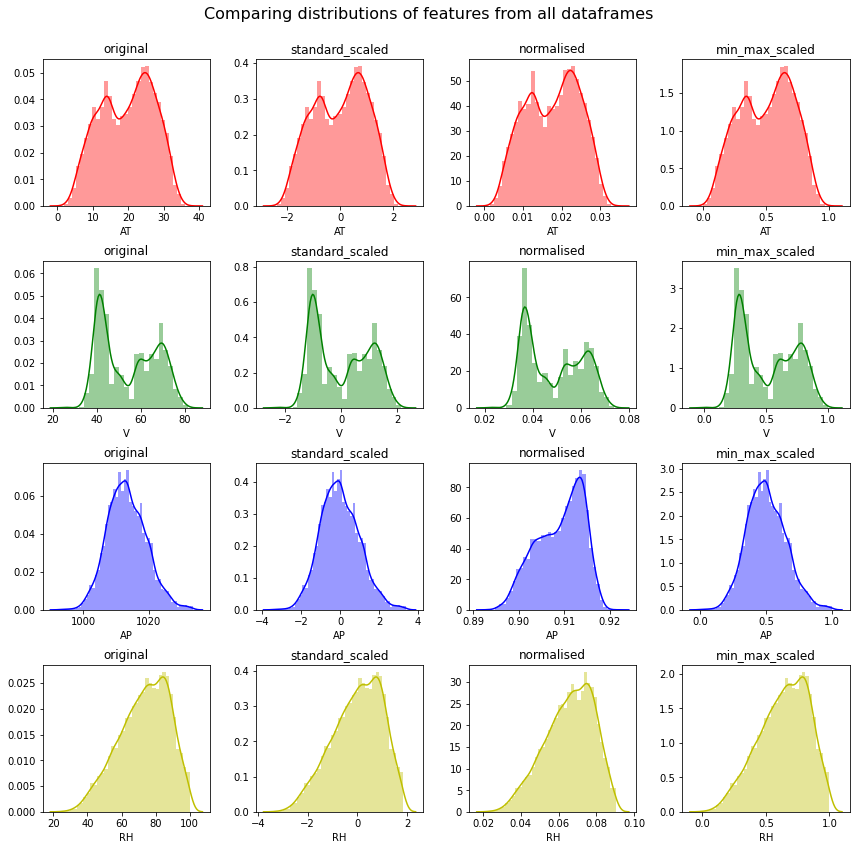

In [20]:
data = pd.read_excel('Folds5x2_pp.xlsx')
dfs = [data,df,df2,df3]
fig, ax = plt.subplots(4,4,figsize = (12,12))
cols = list(df3.columns)[:-1]
titles = ['original','standard_scaled','normalised','min_max_scaled']
fig.suptitle('Comparing distributions of features from all dataframes',fontsize = 16)
for i,col in enumerate(cols):
  for j,frame in enumerate(dfs):
    colors = ['r','g','b','y']
    sns.distplot(frame[col],color = colors[i],ax = ax[i,j])
    ax[i,j].title.set_text(titles[j])
fig.tight_layout()
fig.subplots_adjust(top=0.92)

In [21]:
print('Original DataFrame')
X_train,X_test,y_train,y_test = train_test_split(data.values[:,:-1],data.PE,test_size = 0.2)
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
score = lr.score(X_test,y_test)
print('R^2 score for data : {}'.format(score))
mean_sq_err = mean_squared_error(y_test,y_pred)
print('Mean squared error : {}'.format(mean_sq_err))

Original DataFrame
R^2 score for data : 0.9299075012981417
Mean squared error : 20.245591617809556


In [22]:
print('Standard Scaled DataFrame')
X_train,X_test,y_train,y_test = train_test_split(df.values[:,:-1],df.PE,test_size = 0.2)
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
score = lr.score(X_test,y_test)
print('R^2 score for df : {}'.format(score))
mean_sq_err = mean_squared_error(y_test,y_pred)
print('Mean squared error : {}'.format(mean_sq_err))

Standard Scaled DataFrame
R^2 score for df : 0.9295291344630225
Mean squared error : 20.23985745162759


In [23]:
print('Normalized DataFrame')
X_train,X_test,y_train,y_test = train_test_split(df2.values[:,:-1],df2.PE,test_size = 0.2)
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
score = lr.score(X_test,y_test)
print('R^2 score for df2 : {}'.format(score))
mean_sq_err = mean_squared_error(y_test,y_pred)
print('Mean squared error : {}'.format(mean_sq_err))

Normalized DataFrame
R^2 score for df2 : 0.9989489547233411
Mean squared error : 1.4424349685722826e-07


In [24]:
print('Min Max Scaled DataFrame')
X_train,X_test,y_train,y_test = train_test_split(df3.values[:,:-1],df3.PE,test_size = 0.2)
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
score = lr.score(X_test,y_test)
print('R^2 score for df3 : {}'.format(score))
mean_sq_err = mean_squared_error(y_test,y_pred)
print('Mean squared error : {}'.format(mean_sq_err))

Min Max Scaled DataFrame
R^2 score for df3 : 0.9222277261174819
Mean squared error : 22.294646146727892
